# Chapter 10: Monte Carlo simulation

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Monte carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method)
```

````{prf:definition} Monte Carlo simulation
:label: 101.1
:nonumber:
Monte Carlo simulation is a computational technique that rely on repeated random samplings to obtain numerical results. 
````

## Approximate integrals
Monte Carlo simulation can be used to calculate intractable integrals. Let $\int k(x)dx$ be the intractable integral and $f(x)$ is a probability density with the same domain as $k(x)$. 

$$\int k(x)dx = \int \frac{k(x)}{f(x)}f(x)dx$$

Let $g(x) = \frac{k(x)}{f(x)}$. The target integral is equal to the expectation of $g(x)$ with respect to the probability density $f(x)$,

$$\int k(x)dx = E(g(x))$$

By the law of large numbers, the expectation $E\left(g(x)\right)$ can be approximated by the sample average of $g(x)$, i.e.,

$$
E(g(x)) \approx \frac{1}{n} \sum_{i=1}^{n} g\left(x_{i}\right)
$$

It indicates that we can generate a ransom sample $\left(x_{1}, \ldots, x_{n}\right)$ from $f(x)$ and then calculate the average $\frac{1}{n} \sum_{i=1}^{n} g\left(x_{i}\right)$ to approximate the intractable integral $\int k(x)dx$

```{prf:algorithm} Monte Carlo simulation
:label: alg1

**Inputs**: a probability distribution $f(x)$

**Output**: compute the integral $\int k(x)dx$

1. Generate $n$ random numbers $\left(x_{1}, \ldots, x_{n}\right)$ from the distribution $f(x)$
2. Calculate the average $\frac{1}{n} \sum_{i=1}^{n} k(x_i)/f(x_i)$

```

````{prf:example} 10.1
:nonumber:
:label: 10.1
:nonumber:
Calculate $\int_{0}^{\infty}log(x) e^{-x} d x$

Note that $e^{-x}$ is the exponential density function with mean $=1$. Thus, the integral is the expectation $E(\log (x))$. Monte Carlo approximation to the integral includes the following steps

1) Generate $n$ random numbers $\left(x_{1}, \ldots, x_{n}\right)$ from the exponential distribution with $\lambda=1$.

2) Approximate the integral by $\frac{1}{n} \sum_{i=1}^{n} \log \left(x_{i}\right)$
````

In [1]:
x = rexp(10000)
mean(log(x))

[1] -0.547443

````{prf:example} 10.2
:nonumber:
:label: 10.2
:nonumber:
Calculate $\int_{1}^{5} \frac{2 \log (x)}{x^{2}} d x$. Note that $\int_{1}^{5} \frac{2 \log (x)}{x^{2}} d x=\int_{1}^{5} \frac{8 \log (x)}{x^{2}} \frac{1}{4} d x$ and $\frac{1}{4}$ is the density of uniform (1,5). The integral $\int_{1}^{5} \frac{2 \log (x)}{x^{2}} d x=E(g(X))$, in which $g(x)=\frac{8 \log (x)}{x^{2}}$ and the density $f(x)=\frac{1}{4}$.
````

In [2]:
x = runif(10000,1,5)
mean(8*log(x)/x^2)

[1] 0.9520741

## Simulation-based inference
If the population (or the probability distribution) is given, we can generate random samples from the probability distribution. The random samples generated from computers are called simulated data which can be used to perform a wide range of statistical inference

### Calculating the variance of an estimator 
Suppose $\left(x_{1}, \ldots, x_{n}\right)$ is a random sample generated from a given probability distribution with a given parameter $\theta$. Let $\hat{\theta}$ be the estimator of $\theta$. The variance of $\hat{\theta}$ can be approximated by the sample variance of $\hat{\theta}$. 

````{prf:example} 10.3
:nonumber:
:label: 10.3
:nonumber:
A random sample of size 10 are generated from the normal distribution with mean 1 and variance 1 . Find the variance of $\hat{\theta}=\frac{x_{\min }+x_{\max }}{2}$.

We use Monte Carlo simulation to approximate $var\left(\hat{\theta}\right)$

1. Generate 100 samples of size 10 from the normal distribution with mean 1 and variance 1.

2. For each sample, calculate $\hat{\theta}=\frac{x_{\min }+x_{\max }}{2}$. Then we have $\left(\widehat{\theta_{1}}, \ldots, \widehat{\theta_{100}}\right)$

3. $\operatorname{var}(\hat{\theta}) \approx$ sample variance of $\left(\widehat{\theta_{1}}, \ldots, \widehat{\theta_{100}}\right)$
````

In [3]:
nsim = 100
theta_hat = 1:nsim

for(i in 1:nsim){
  x = rnorm(10,mean=1,sd=1)
  theta_hat[i] = (max(x)+min(x))/2
}

var(theta_hat)

[1] 0.1800372

### Comparing the performance of estimators

The mean squared error $E\left[(\hat{\theta}-\theta)^{2}\right]$ of the estimator $\hat{\theta}$ of the parameter $\theta$ can be approximated by simulation. When the true $\theta$ is given, the expectation $E\left[(\hat{\theta}-\theta)^{2}\right]$ can be approximated by the sample average of $\left(\widehat{\theta}_{i}-\theta\right)^{2}$, in which $\widehat{\theta}_{i}$ is calculated from the sample $i$ generated from the probability distribution.

````{prf:example} 10.4
:nonumber:
:label: 10.4
:nonumber:
A random sample of size 10 is generated from the normal distribution with the unknown mean $\mu$ and variance 1. We want to compare the mean squared errors of two estimators, the sample median $\tilde{x}$ and the sample average $\bar{x}$, of the population mean $\mu$.

We use Monte Carlo simulation to approximate the mean squared error.
1. Generate 100 samples of size 10 from the normal distribution $(\mu=a,\sigma^2=1)$.

2. For each sample, calculate the squared error $m=(\tilde{x}-a)^{2}$ of the sample median $\tilde{x}$. Now, we have 100 errors.

3. $E\left[(\tilde{x}-\mu)^{2}\right] \approx$ the average of $\left(m_{1}, \ldots, m_{100}\right)$.

Similarly, we calculate the mean squared error of $\tilde{x}$ for other values of $\mu$. We can make a plot of the mean squared error of the sample median $\tilde{x}$ for a range of values of $\mu$. 

Using the same procedure, we calculate the mean squared error of the sample average $\bar{x}$ for the same range of values of $\mu$. Then, we compare the mean squared errors of $\tilde{x}$ and $\bar{x}$ for each $\mu$.
````

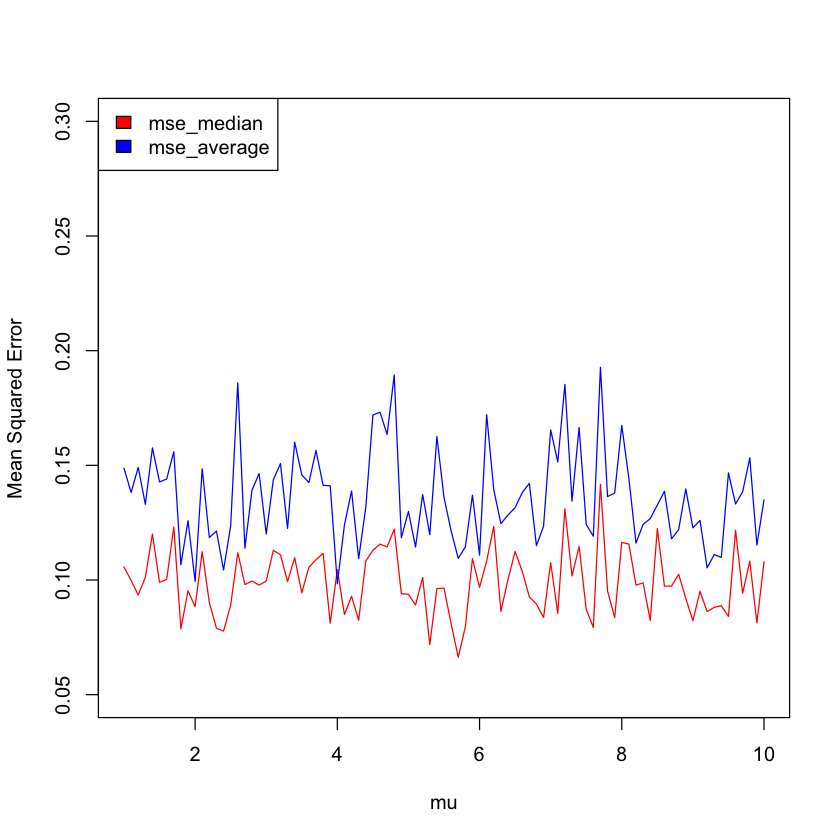

In [4]:
nsim = 100
mu = seq(1,10,by=0.1)
n = length(mu)
sample_median = sample_average = 1:nsim
mse_median = mse_average = 1:n

for(j in 1:n){
  for(i in 1:nsim){
    x = rnorm(10,mean=mu[j],sd=1)
    sample_median[i] = mean(x)
    sample_average[i] = median(x)
  }
  mse_median[j] = mean((sample_median-mu[j])^2)
  mse_average[j] = mean((sample_average-mu[j])^2)
}

plot(mu, mse_median, type="l", col="red",pch=16, ylim=c(0.05,0.3),ylab="Mean Squared Error")
points(mu, mse_average, type="l", col="blue", pch=16)
legend("topleft", legend=c("mse_median", "mse_average"), fill = c("red","blue"))


### Approximate the power of hypothesis tests

The power is $P\left(\right.$ reject $\left.H_{0} \mid H_{1}\right)$, which can be approximated by simulation, when the alternative probability distribution under $\mathrm{H}_{1}$ is given. We generate samples under $\mathrm{H}_{1}$. The power of a test, i.e., the probability of rejecting $\mathrm{H}_{0}$, is approximated by the proportion of samples for which $\mathrm{H}_{0}$ is rejected by the test. If the alternative hypothesis is an interval of parameter $\theta$, we need to calculate the power for each value of $\theta$.

````{prf:example} 10.5
:nonumber:
:label: 10.5
:nonumber:
We want to calculate the power of the two sample t-test. Suppose the samples are generated from the normal distribution with mean $\mu$ and variance 1 . $\mathrm{H}_{0}: \mu_{1}=\mu_{2}$ vs $\mathrm{H}_{1}: \mu_{1} \neq \mu_{2}$. Let $\mu_{1}=2$. To approximate the power of two sample t-test, we

1) Generate 100 data sets. Each data set contains two samples. The first sample is generated from the normal distribution $\left(\mu_{1}=2, \sigma^2=1\right)$. The second sample is generated from another normal distribution $\left(\mu_{2}=3, \sigma^2=1\right)$. 

2) For each data set, we perform two sample t-test.

3) The power for $\mu_{2}=3$ is equal to the proportion of data sets for which $\mathrm{H}_{0}$ is rejected

Similarly, we can calculate the power of two sample t-test for other values of $\left(\mu_{1}, \mu_{2}\right)$, which produces the power curve of the two sample t-test.
````

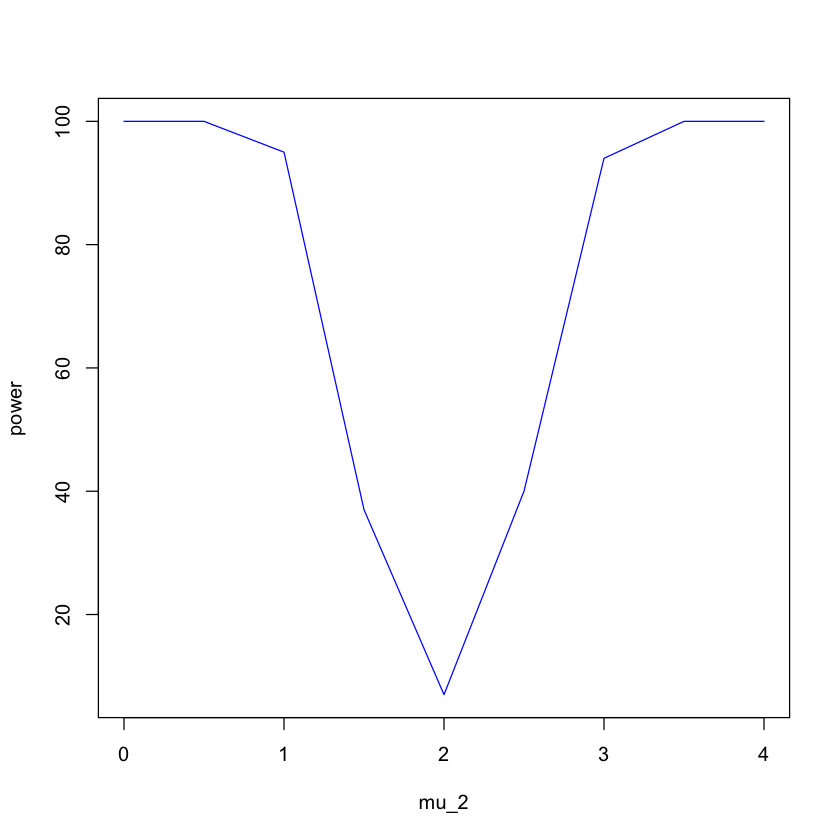

In [5]:
n1=20
n2=25
mu_2 = seq(0,4,by=0.5)
n = length(mu_2)
nsim = 100
pvalue = 1:nsim
power = 1:n

for(j in 1:n){
  for(i in 1:nsim){
    x = rnorm(n1,mean=2,sd=1)
    y = rnorm(n2,mean=mu_2[j],sd=1)
    pvalue[i] = t.test(x, y, alternative = "two.sided")$p.value
  }
  power[j] = sum(pvalue<0.05)
}
plot(mu_2,power,col="blue",type="l",pch=16)
